### Tittle: Telco Churn Classification Project

In this project,we aim to find the likelihood of a customer leaving an organization, the key indicators of churn, as well as the retention strategies that can be implemented to avert this problem, thus, we focus on building classification models to perform churn analysis on customer data, a critical task for companies looking to enhance their revenue by retaining customers.

## 1.0 Business Understanding

### 1.1 Introduction
Customer churn  is a significant problem in the telecom industry as it results in reduced profit margin and negatively impacting long-term sustainability. 
Churn, which refers to customers discontinuing their service and moving to a competitor, can be driven by various factors such as charges, customer service quality, network coverage, and the competitiveness of offerings. The implications of high churn rates are:

* Revenue Loss
* Decreased ROI on marketing
* Reputational Damage due to Customer dissatisfaction
* Reduced Market Share and Growth
* Lower Employee Morale
* Financial Uncertainty

Due to this, Machne Learning and Advanced Analytics has proided us with the technologies to transform raw data into actions and insights. We will employ Classification models to get actionable insights.

Classification in Machine Learning is a supervised learning approach where the computer program learns from provided data to make new observations by classifying. Various classification algorithms such as logistic regression, decision trees, random forests, and gradient boosting will be explored to identify the most effective model for the given dataset.
The **objective** is to determine the class or category into which new data points will fall. 

In this project, an elaborate analysis will be conducted to train at least some models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

### 1.2 Project Objective
Objective of this project is to develop a classification model for churn analysis which is to predict whether customers are likely to leave or continue their relationship with the company. By identifying customers at risk of churning, the company can take proactive measures to retain them, thus increasing revenue and profit margins.

### 1.3 Data Description
The project will utilize historical data that contains details on customer behaviours and transactional details.
Datasets will be retrieved from various sources including a database, GitHub repository and Onedrive.


### 1.4 Success metrics
- `Good:` accurately predicting churn at least 75% measured with the harmonic f1-score metric. 

- `Excellent:` accurately predicting churn at least 80%.


### 1.5 Hypothesis
**Hypothesis 1**

`Null Hypothesis (Ho):` There is no significant difference in churn rates between customers with higher and lower monthly charge.

`Alternative Hypothesis (Ha):` There is a significant difference in churn rates between customers with higher and lower monthly charge.


### 1.6 Business Questions
1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. Is there a correlation between the contract term (Contract) and customer churn?
4. What are the common payment methods (Payment Method) among customers who churned?
5. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
6. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
7. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?
## 2.0 Data Understanding

### 2.1 Inspecting the dataset in depth.

A. Data Quality Assessment(info, duplicates, null values, describe etc.)

B. Univariate Analysis: Explore, analyze and visualize key variables independently of others

C. Bivariate Analysis: Explore, analyze and visualize the relationship variables pairs of different dimensions

D. Multivariate Analysis: Explore, analyze and visualize the relationship among variables

E. Answer Analytical Questions

F. Test Hypothesis:

G. Provide insights:

In [103]:
#!pip install openpyxl

In [104]:
#import libraries
import pandas as pd
import numpy as np
import sqlalchemy as sa 
from dotenv import dotenv_values
import pyodbc
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

In [105]:
warnings.filterwarnings("ignore")

In [106]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env_telco_churn_db')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [107]:
username

'LP2_project'

In [108]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [109]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [110]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [111]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [112]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [113]:
#load second dataset
data2 = pd.read_csv("data/LP2_Telco-churn-second-2000.csv")
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [114]:
#compare columns
print(data.columns)
print(data2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [115]:
#load test dataset
test_data = pd.read_excel("data/Telco-churn-last-2000.xlsx")
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [116]:
#join data and data1 DataFrame

train_data = pd.concat([data,data2], ignore_index=True)
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [117]:
train_data.shape

(5043, 21)

In [118]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


The columns present in the dataset are:
 
- **Gender**: Whether the customer is a male or a female
 
- **SeniorCitizen**: Whether a customer is a senior citizen or not
 
- **Partner**: Whether the customer has a partner or not (True, False)
 
- **Dependents**: Whether the customer has dependents or not ((True, False)
 
- **Tenure**: Number of months the customer has stayed with the company
 
- **Phone Service**: Whether the customer has a phone service or not ((True, False
 
- **MultipleLines**: Whether the customer has multiple lines or not
 
- **InternetService**: Customer's internet service provider (DSL, Fiber Optic, No)
 
- **OnlineSecurity**: Whether the customer has online security or not ((True, False, No Internet)
 
- **OnlineBackup**: Whether the customer has online backup or not ((True, False, No Internet)
 
- **DeviceProtection**: Whether the customer has device protection or not ((True, False, No internet service)
 
- **TechSupport**: Whether the customer has tech support or not ((True, False, No internet)
 
- **StreamingTV**: Whether the customer has streaming TV or not ((True, False, No internet service)
 
- **StreamingMovies**: Whether the customer has streaming movies or not ((True, False, No Internet service)
 
- **Contract**: The contract term of the customer (Month-to-Month, One year, Two year)
 
- **PaperlessBilling**: Whether the customer has paperless billing or not ((True, False)
 
- **Payment Method**: The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
 
- **MonthlyCharges**: The amount charged to the customer monthly
 
- **TotalCharges**: The total amount charged to the customer
 
- **Churn**: Whether the customer churned or not ((True, False)

In [119]:
#convert TotalCharges column to float for both train and test dataset
train_data["TotalCharges"] = pd.to_numeric(train_data["TotalCharges"], errors="coerce")
test_data["TotalCharges"] = pd.to_numeric(test_data["TotalCharges"], errors="coerce")

print(train_data["TotalCharges"].dtype)
print(test_data["TotalCharges"].dtype)

float64
float64


In [120]:
#chechk for missing values
train_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

### Key Observations:
 
These columns contain **missing data**
    `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`,  `StreamingMovies`, `TotalCharges`, '`Churn`
 
 `MultipleLines` has 269 missing values
 `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`,  `StreamingMovies` has 651 missing values.
 
 `TotalCharges`     has 8 missing values
 
 `Churn`            has 1 missing value

In [121]:
def summary(df):
    unique_summary = []
    #iterate through each column
    for col in df.columns:
        #get unique values of the column
        unique_values = df[col].unique()
        #get the count of the unique values
        unique_count = len(unique_values)
        #append evrything to the empty list
        unique_summary.append({
            "Column": col,
            "Unique value count": unique_count,
            "Unique values": unique_values
        })
    summary_df = pd.DataFrame(unique_summary)

    return summary_df


In [122]:
summary(train_data)

,Column,Unique value count,Unique values
0,customerID,5043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,4,"[True, False, No, Yes]"
4,Dependents,4,"[False, True, No, Yes]"
5,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,4,"[False, True, Yes, No]"
7,MultipleLines,6,"[None, False, True, No, No phone service, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,6,"[False, True, None, No, Yes, No internet service]"


#### Recommendations:
- Drop the `CustomerID` column.
- The count of unique values tends to be highest in numerical columns.
- Standardize the unique values of categorical columns to allow consistency by casting to "Yes" or "No" where implied. Therefore, False, 0, "No phone service" and "No internet service" become "No", while True & 1 becomes "Yes". (13 columns)
- "None" values are missing or null values so replace NULL/None with pd.NA  
- Consider visualization techniques such as histograms, bar plots, or box plots to gain deeper insights into the distribution of categorical and numerical variables.

In [123]:
#drop the column customer ID
train_data.drop(columns="customerID", axis=1, inplace=True)

In [124]:
#display all columns with objest data type
categorical = train_data.select_dtypes(include="object").columns.tolist()
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [125]:
#convert colums with objest data type to string
train_data[categorical] = train_data[categorical].astype(str)

In [126]:
yep = {
    "No": ["False", "0", "No phone service", "No internet service"],
    "Yes": ["True", "1"]
}
 
# Function to make corrections on a DataFrame
def correct_columns(train_data, categorical, yep):
   
    for column_name in categorical:
        for key, values in yep.items():
            # Replace values in the DataFrame for each column
            train_data[column_name] = train_data[column_name].replace(values, key)
    return train_data
 
# Apply corrections to the DataFrame
train_data = correct_columns(train_data, categorical, yep)

In [127]:
summary(train_data)

,Column,Unique value count,Unique values
0,gender,2,"[Female, Male]"
1,SeniorCitizen,2,"[0, 1]"
2,Partner,2,"[Yes, No]"
3,Dependents,2,"[No, Yes]"
4,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
5,PhoneService,2,"[No, Yes]"
6,MultipleLines,3,"[None, No, Yes]"
7,InternetService,3,"[DSL, Fiber optic, No]"
8,OnlineSecurity,3,"[No, Yes, None]"
9,OnlineBackup,3,"[Yes, No, None]"


In [128]:
#get columns with number data type
numerical = train_data.select_dtypes(include=["number"])
numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.850000,29.850000
1,0,34,56.950001,1889.500000
2,0,2,53.849998,108.150002
3,0,45,42.299999,1840.750000
4,0,2,70.699997,151.649994
...,...,...,...,...
5038,0,24,84.800000,1990.500000
5039,0,72,103.200000,7362.900000
5040,0,11,29.600000,346.450000
5041,1,4,74.400000,306.600000


In [129]:
#get stats on numerical columns
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [130]:
#get stats on categorical columns
train_data.describe(include="object").T

,count,unique,top,freq
gender,5043,2,Male,2559
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,5043,3,No,2644
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,5043,3,No,2936
OnlineBackup,5043,3,No,2660
DeviceProtection,5043,3,No,2648
TechSupport,5043,3,No,2901


In [131]:
numerical.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      8
dtype: int64

In [132]:
#display columns with null values in the column TotalCharge
train_data[train_data["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,0,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,No
4670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


### Imputation of missing values

In [133]:
#fill null values in TotalCharges with median (median is not acceptable to outliers)
numerical["TotalCharges"].fillna(numerical["TotalCharges"].median(), inplace=True)

In [134]:
numerical.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [135]:
summary(train_data[["PaymentMethod"]])

,Column,Unique value count,Unique values
0,PaymentMethod,4,"[Electronic check, Mailed check, Bank transfer..."


In [136]:
cat_col = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Churn']

In [137]:
#fill null values in categorical colums
for col in cat_col:
    train_data[col].replace(" ", np.nan, inplace=True)
    train_data[col].replace("None", np.nan, inplace=True)
    train_data[col].replace("NaN", np.nan, inplace=True)
    train_data[col].replace("nan", np.nan, inplace=True)
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

In [138]:
#display unique values of categorical col
for col in cat_col:
    print(f"Unique values in {col}: {train_data[col].unique()}")

Unique values in MultipleLines: ['No' 'Yes']
Unique values in OnlineSecurity: ['No' 'Yes']
Unique values in OnlineBackup: ['Yes' 'No']
Unique values in DeviceProtection: ['No' 'Yes']
Unique values in TechSupport: ['No' 'Yes']
Unique values in StreamingTV: ['No' 'Yes']
Unique values in StreamingMovies: ['No' 'Yes']
Unique values in Churn: ['No' 'Yes']


In [139]:
#calculate skewness / kurtosis / mean / median
def stats(df):
    for col in df:
        
        #calculations
        skewness = round(df[col].skew(), 2)
        kurtosis = round(df[col].kurtosis(), 2)
        mean = round(df[col].mean(), 2)
        median = round(df[col].median(), 2)

        #display outputs
        print(f"{col.upper()}")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
        print(f"Mean : {mean}")
        print(f"Median : {median}")
        print("-" * 30)

        #plot graph
       #set main plot size
        plt.figure(figsize=(20, 6))
        # plot histogram with KDE
        plt.subplot(1,2,1)
        sns.histplot(numerical[col], kde=True, color="red", edgecolor= "black")
        plt.axvline(mean, color="yellow", linestyle = "dashed", linewidth =2, label=f"Mean: {mean}")
        plt.axvline(median, color="green", linestyle = "dashed", linewidth =2, label=f"Median: {median}")
        plt.legend()
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
 
        # plot boxplot
        plt.subplot(1,2,2)
        sns.boxplot(x=numerical[col], color="brown")
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.axvline(mean, color="yellow", linestyle = "dashed", linewidth =2, label=f"Mean: {mean}")
        plt.axvline(median, color="green", linestyle = "dashed", linewidth =2, label=f"Median: {median}")
        plt.show()

SENIORCITIZEN
Skewness: 1.83
Kurtosis: 1.35
Mean : 0.16
Median : 0.0
------------------------------


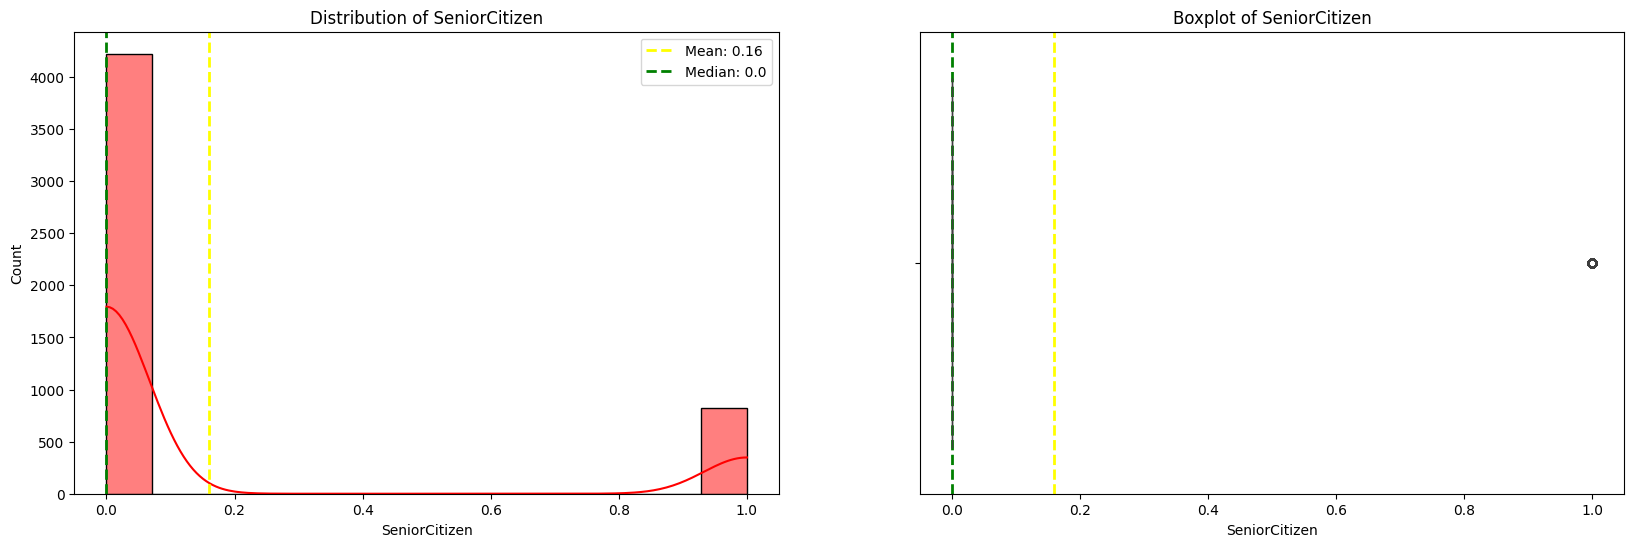

TENURE
Skewness: 0.23
Kurtosis: -1.39
Mean : 32.58
Median : 29.0
------------------------------


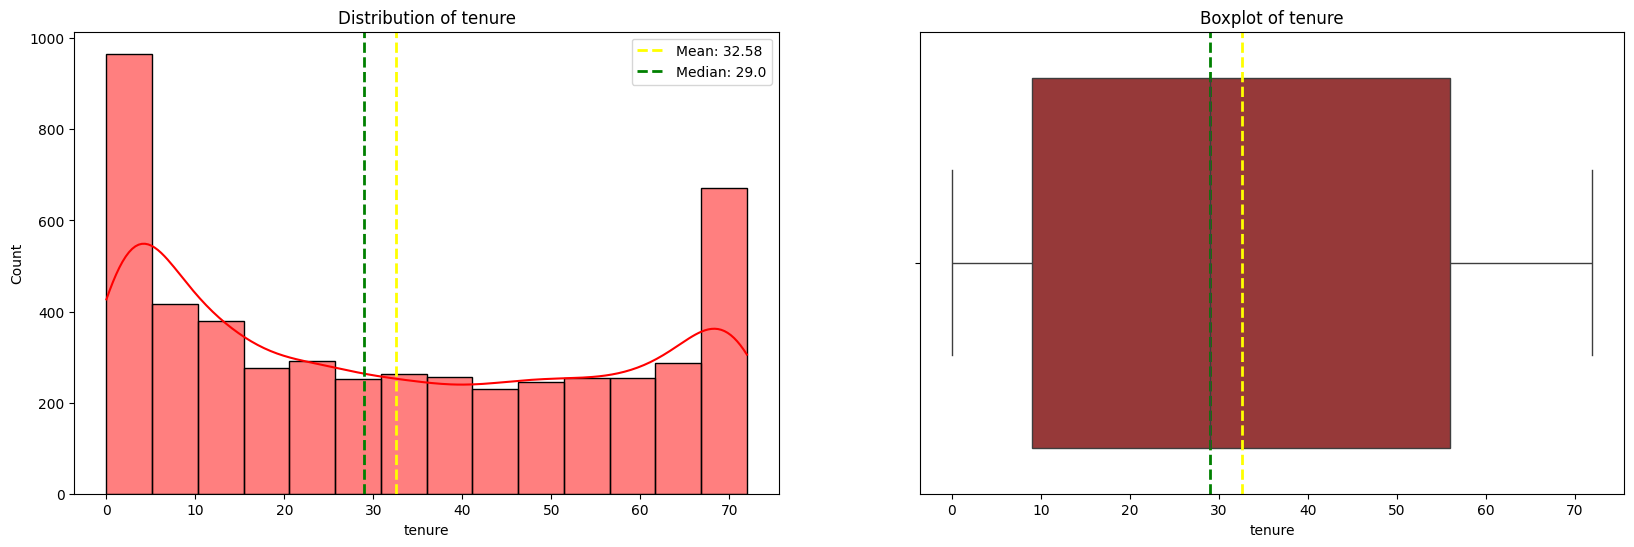

MONTHLYCHARGES
Skewness: -0.24
Kurtosis: -1.25
Mean : 65.09
Median : 70.55
------------------------------


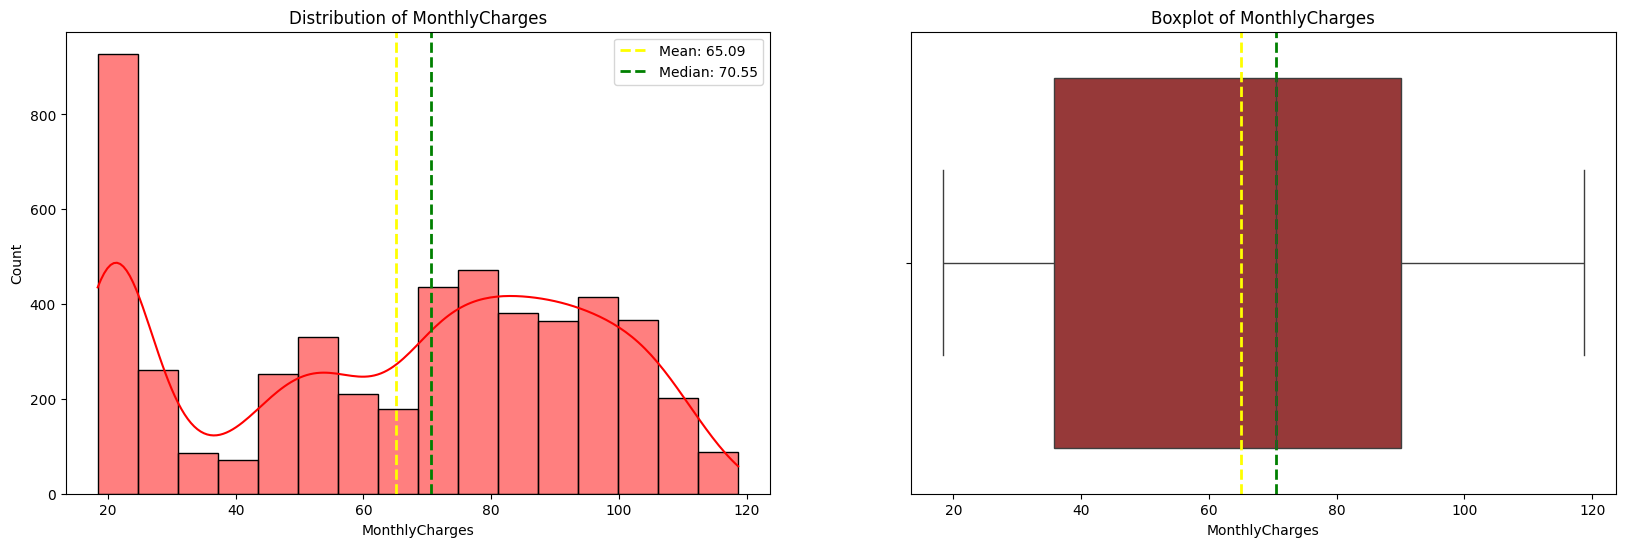

TOTALCHARGES
Skewness: 0.95
Kurtosis: -0.27
Mean : 2300.63
Median : 1401.15
------------------------------


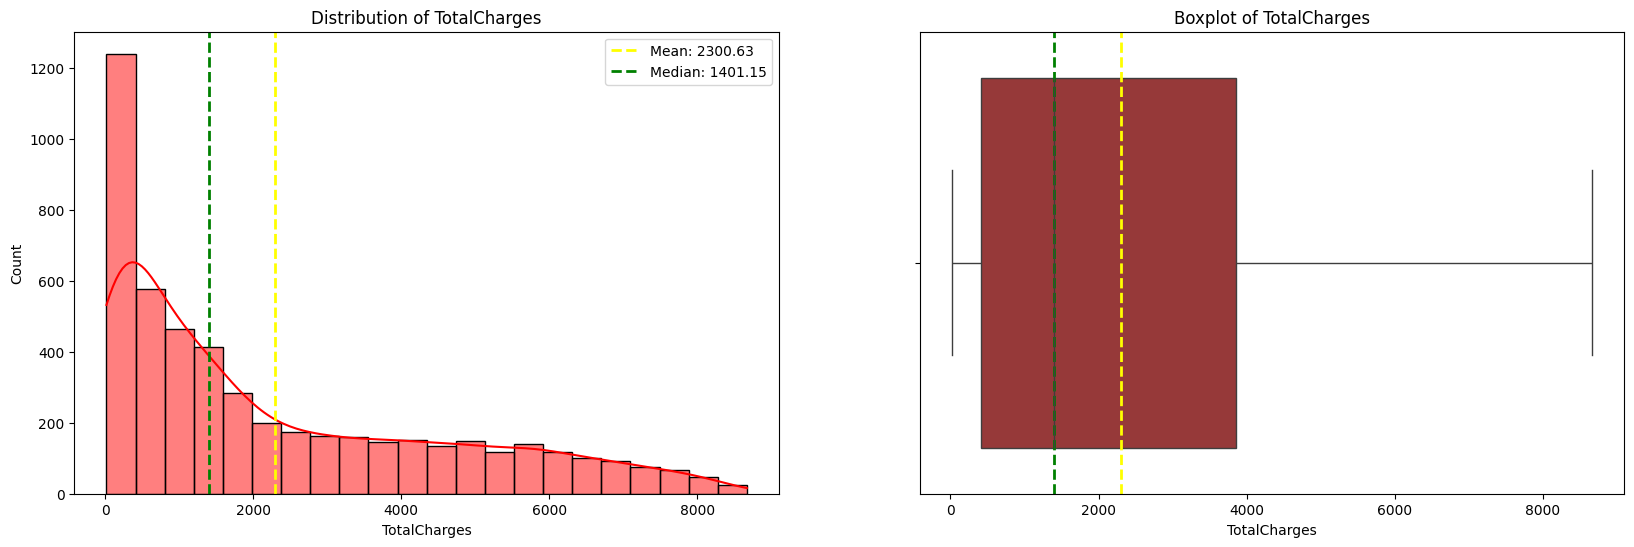

In [140]:
stats(numerical)

In [141]:
def visualize_categoricals(trainset, column):
     
    # plots = ['Countplot', 'Boxplot', 'Violin plot'] # represent the visuals
    # colors = ['blue', 'green', 'red']  # Colors for each column
 
    # Set up the figure and axes
    fig, axes = plt.subplots(3, len(column), figsize=(15, 12))
 
    # Loop through each column and create the plots
    for i, column in enumerate(column):
       
        # Countplot
        count_ax = sns.countplot(x=trainset[column], ax=axes[0, i], color='blue')
        axes[0, i].set_title(f'Countplot of {column}')
 
        # Add percentage labels for countplot bars
        total = len(trainset)
        for container in count_ax.containers:
            labels = [f'{h.get_height()} ({h.get_height()/total*100:.2f}%)' if h.get_height() > 0 else '' for h in container]
            count_ax.bar_label(container, labels=labels)
 
        # Boxplot
        sns.boxplot(y=trainset[column], ax=axes[1, i], color='green')
        axes[1, i].set_title(f'Boxplot of {column}')
 
 
        # Add label for median in the boxplot
        freq_value = trainset[column].mode()
        axes[1, i].text(0.05, freq_value, f'Mode: {freq_value}', color='black', fontsize=10,
                       ha='center', va='center')
 
     
 
        # Violin plot
        sns.violinplot(y=trainset[column], ax=axes[2, i], color='red')
        axes[2, i].set_title(f'Violin plot of {column}')
 
 
        # Add label for mean in the violin plot
        axes[2, i].text(0.05, freq_value, f'Mode: {freq_value}', color='black', fontsize=10,
                       ha='center', va='center')
 
 
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [142]:
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

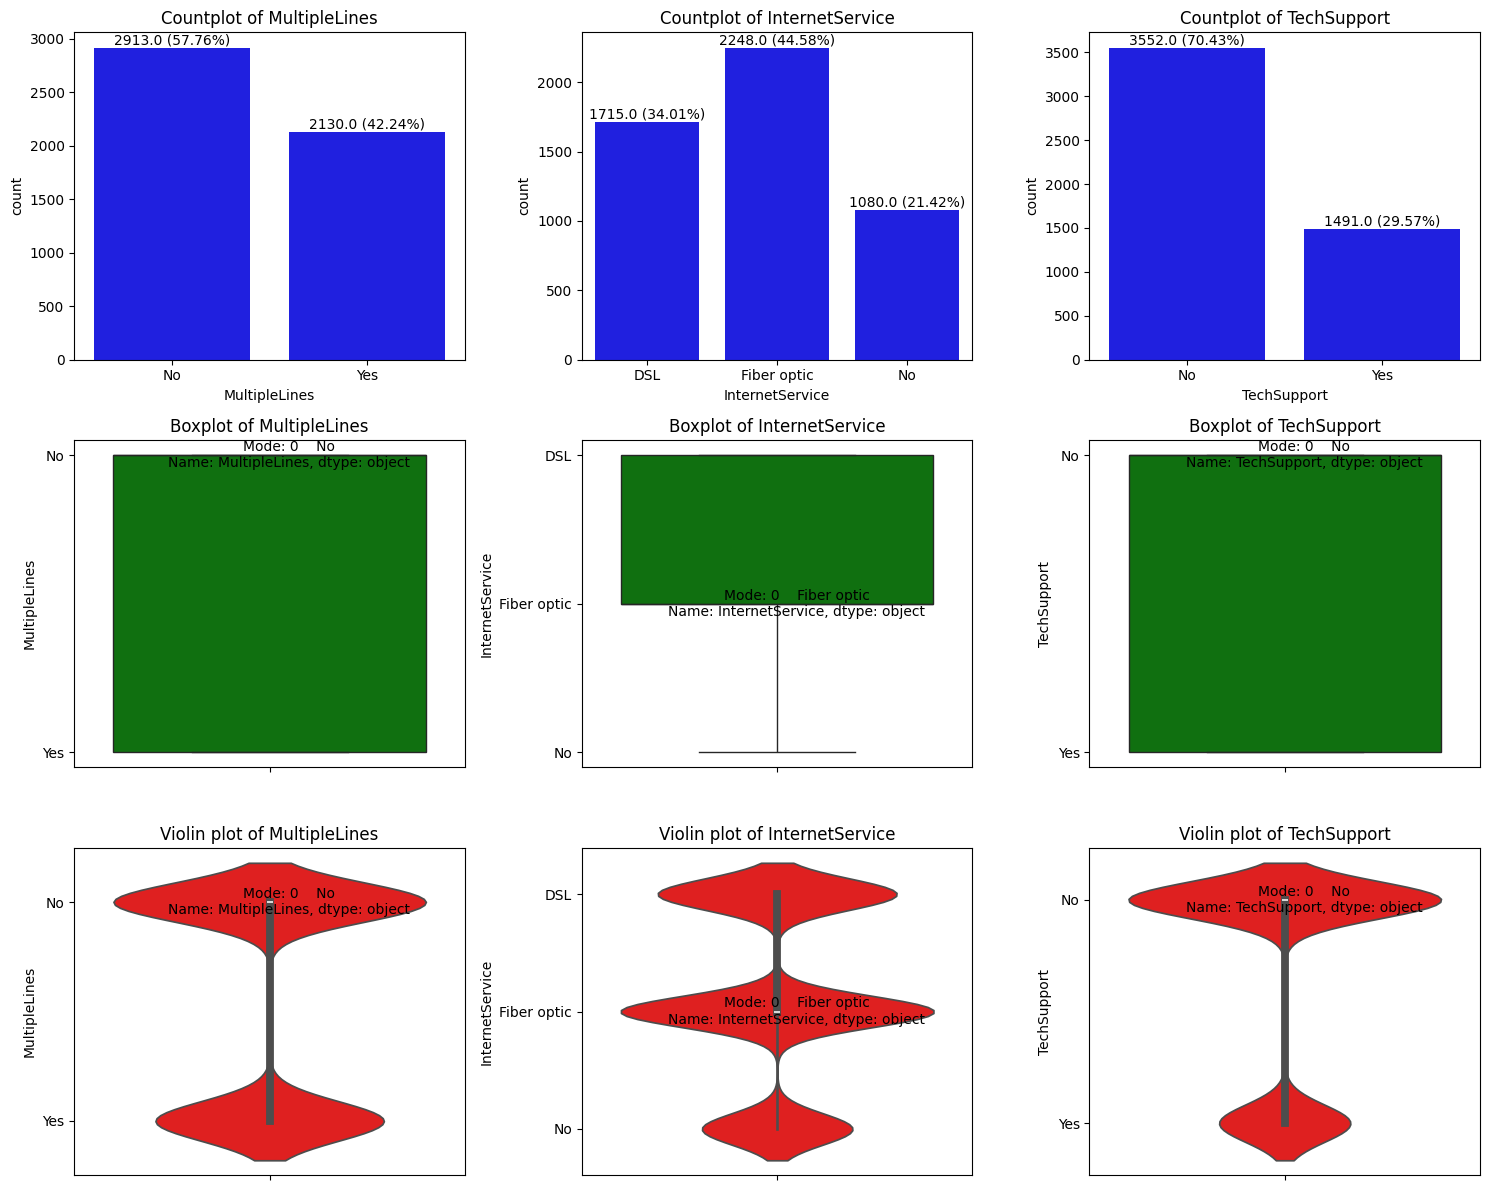

In [143]:
visualize_categoricals(train_data, [ 'MultipleLines', 'InternetService', 'TechSupport'])

In [144]:
import math
 
 
def cat_vs_target(data, column, target):
    # Set up the number of columns and calculate rows
    n_cols = 3
    n_rows = math.ceil(len(all) / n_cols)
 
    # Create figure with dynamic size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
 
    for i, column in enumerate(all):
        ax = axes[i]
       
        # Plot countplot with hue
        sns.countplot(data=train_data, x=column, hue=target, ax=ax)
       
        # Set labels and title
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'{column} vs {target}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
 
        # Add percentage labels
        total_counts = len(train_data)
        for container in ax.containers:
            labels = [f'{h.get_height() / total_counts * 100:.1f}%' for h in container]
            ax.bar_label(container, labels=labels)
 
        # Position the legend
        ax.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
 
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [145]:
all = ["gender", "Partner", "SeniorCitizen", "Dependents","PhoneService","MultipleLines",
                   "InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV", "StreamingMovies", 
                   "Contract", "PaperlessBilling", "PaymentMethod"]

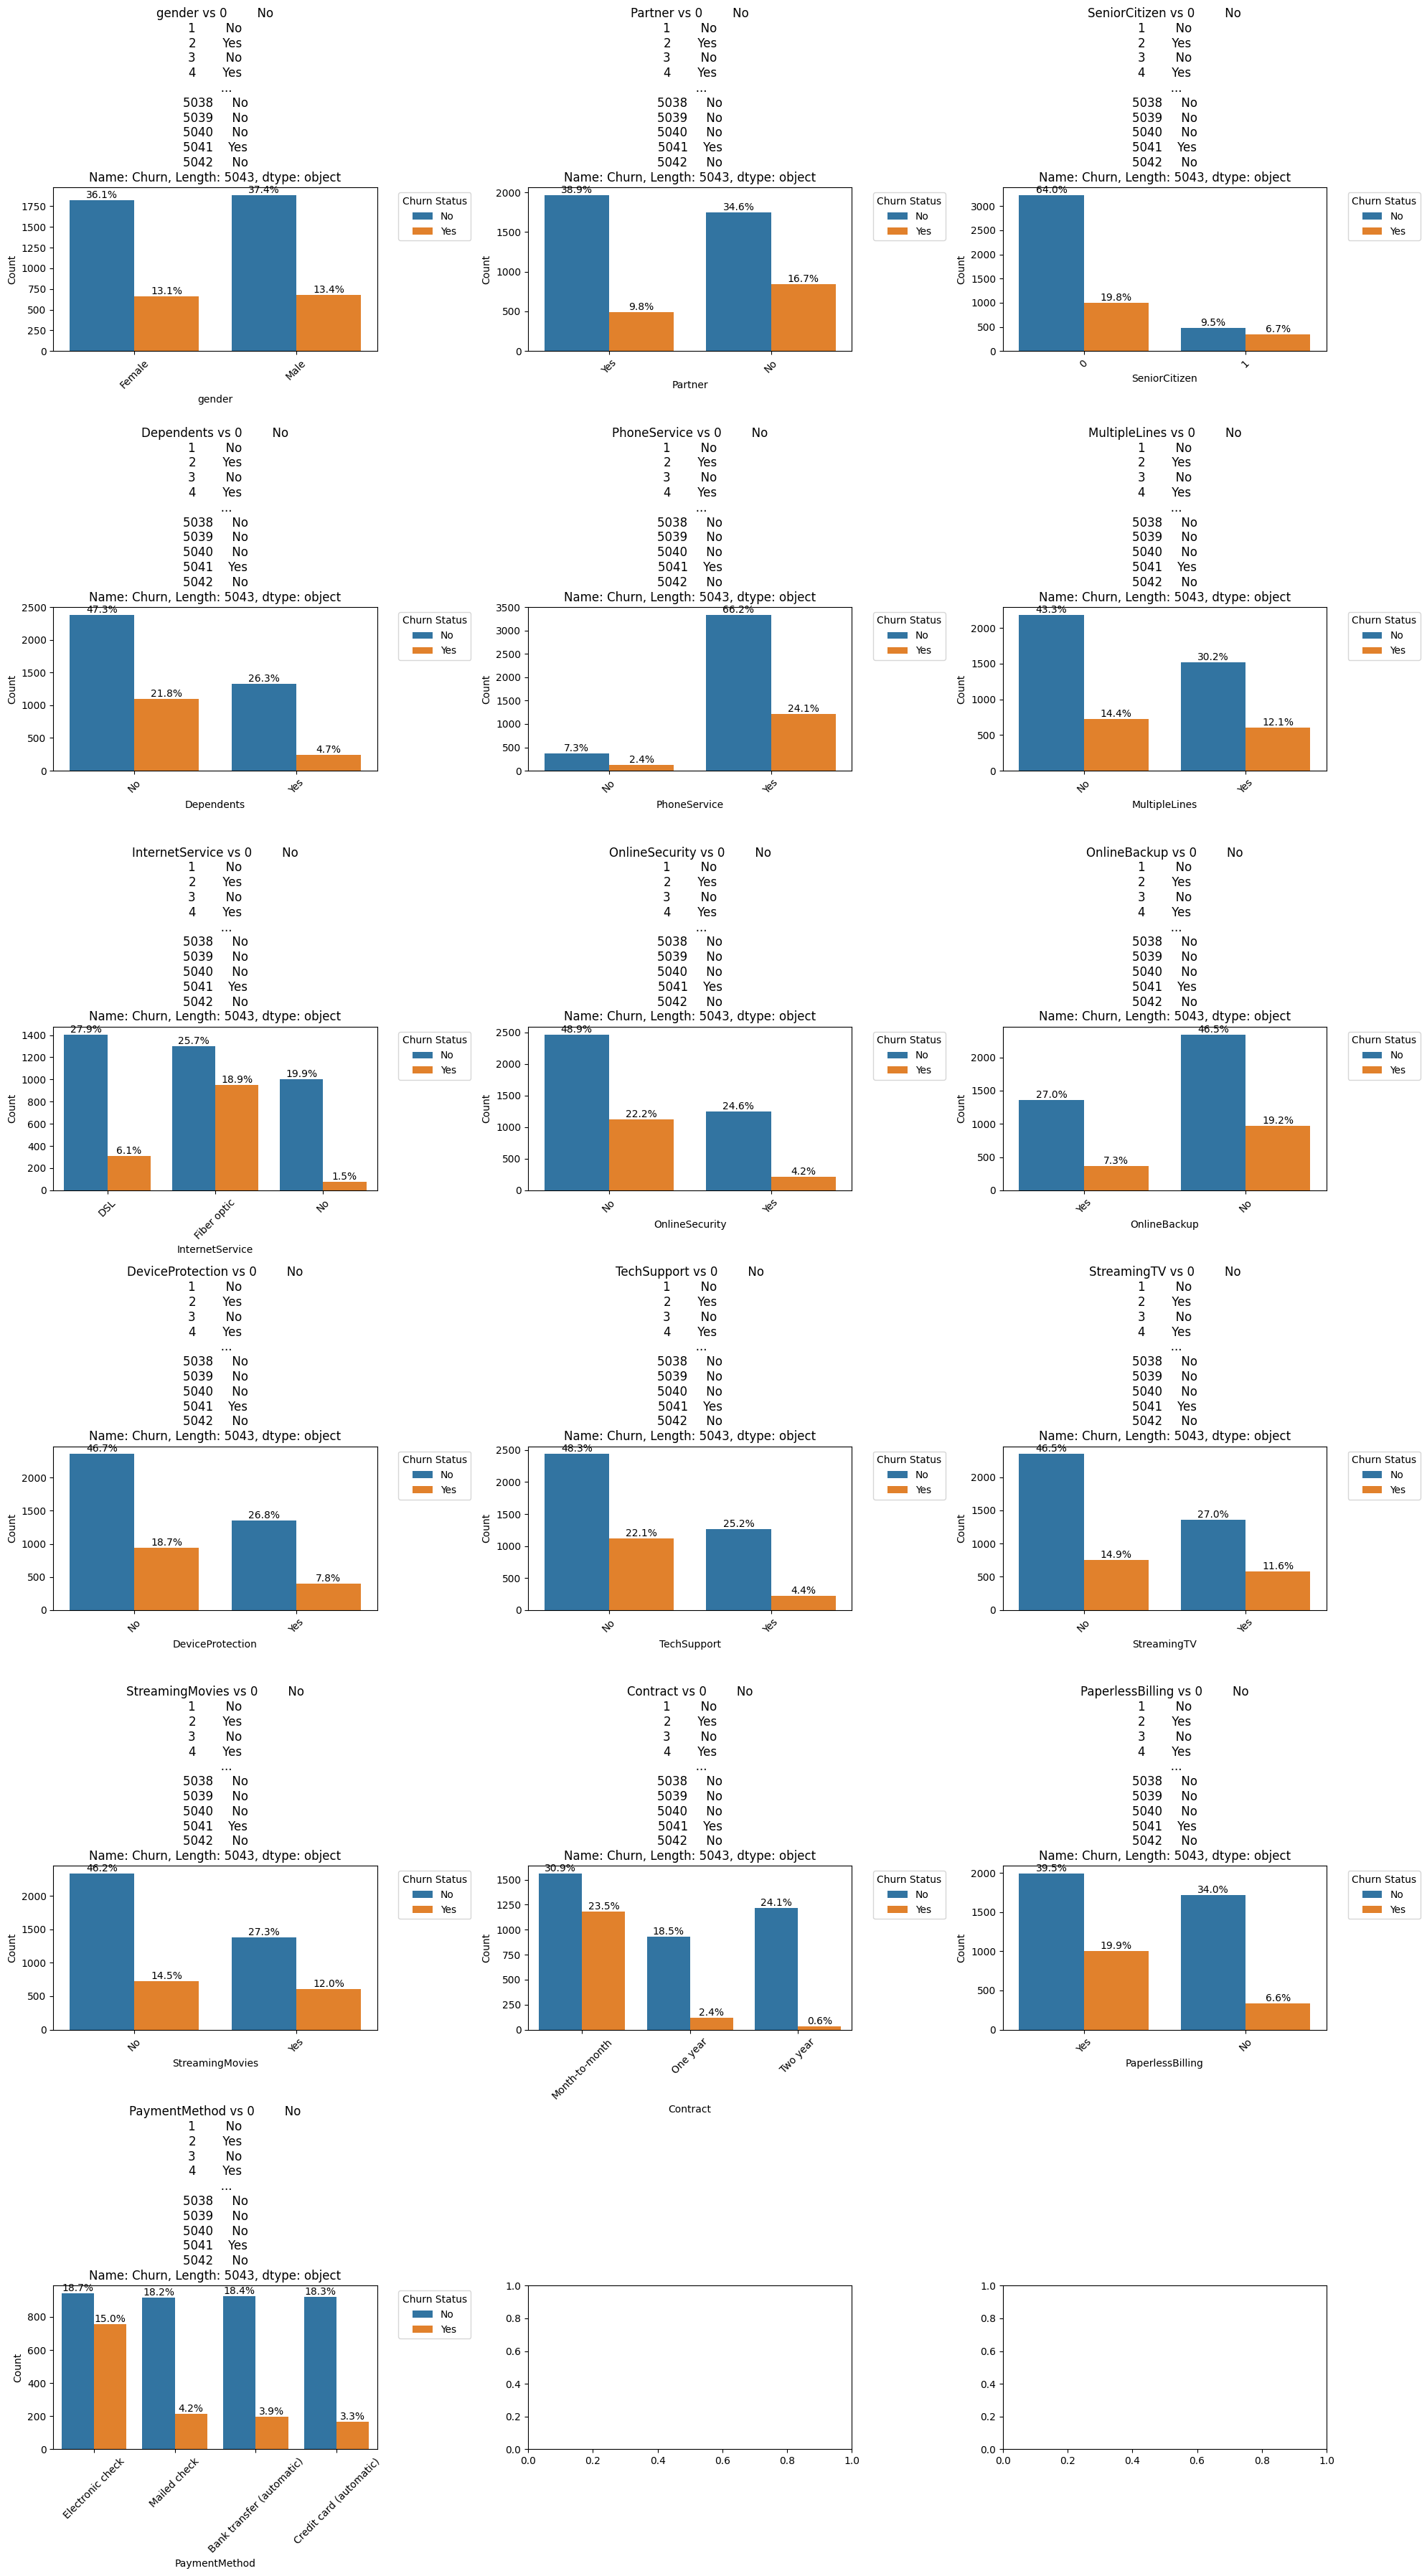

In [146]:
cat_vs_target(train_data, train_data[[ 'MultipleLines', 'InternetService', 'TechSupport']], train_data['Churn'] )

In [147]:
#fill missing data in Total Charges with its mean
train_data["TotalCharges"].fillna(train_data["TotalCharges"].mean(), inplace=True)

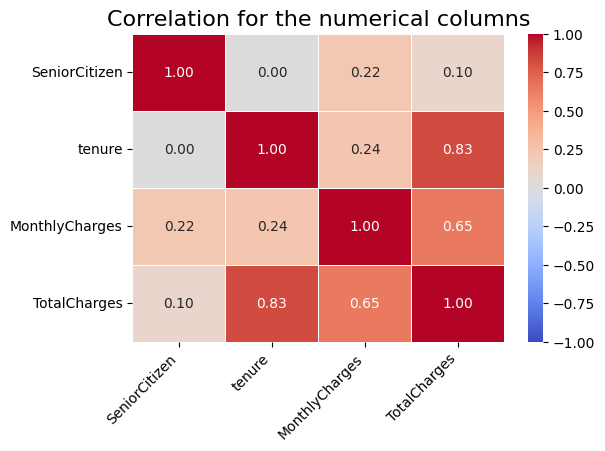

In [148]:
# Calculate the correlation matrix
correlation_matrix = numerical.corr()
 
    # Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")
 
    # Set the title and labels
plt.title("Correlation for the numerical columns", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
 
    # Show the plot
plt.show()

In [149]:
train_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


## Hypothesis Testing

 **T-Test (Two-Sample Independent T-Test)**            
Suppose the monthly charges are **continuous**, and you haven't divided them into categories.         
In that case, you can use a **T-test to compare the means of two groups (churned vs. not churned customers)** and see if there is a statistically significant difference in the average monthly charge.

In [150]:
churned = train_data[train_data["Churn"]=="Yes"]["MonthlyCharges"]
not_churned = train_data[train_data["Churn"]=="No"]["MonthlyCharges"]

t_stat, p_value = ttest_ind(churned, not_churned)
print(f"T-stats: {t_stat:.2f}, p-value: {p_value}")

T-stats: 14.65, p-value: 1.257546511354579e-47


In [151]:
#average of Monthly chargers of customers who churned
train_data[train_data["Churn"]=="Yes"]["MonthlyCharges"].mean()

75.21100299772388

In [152]:
#average of Monthly chargers of customers who did not churned
train_data[train_data["Churn"]=="No"]["MonthlyCharges"].mean()

61.44268950778003

In [153]:
alpha = 0.05

if p_value < alpha:
    print("We reject the null hypothesis. \nThere is a significant difference in the average monthly charge between churned and not churned customers.")
else:
    print("We fail to reject the null hypothesis. \nThere is not a significant difference in the average monthly charge between churned and not churned customers.")

We reject the null hypothesis. 
There is a significant difference in the average monthly charge between churned and not churned customers.


# Analytical questions

 #### 1. What is the average tenure of customers who churned compared to those who stayed?  

In [154]:
criteria = train_data["Churn"] == "Yes"

left_cust = train_data[criteria]
stayed_cust = train_data[~criteria] #inverse or opposite of Churn = Yes

In [155]:
#finding the average tenure of both churned and not churned customers
average_churn = left_cust["tenure"].mean()
average_not_churn = stayed_cust["tenure"].mean()

print(f"Average Tenure of churned cust: {average_churn:.0f}")
print(f"Average Tenure of not churned cust: {average_not_churn:.0f}")

Average Tenure of churned cust: 18
Average Tenure of not churned cust: 38


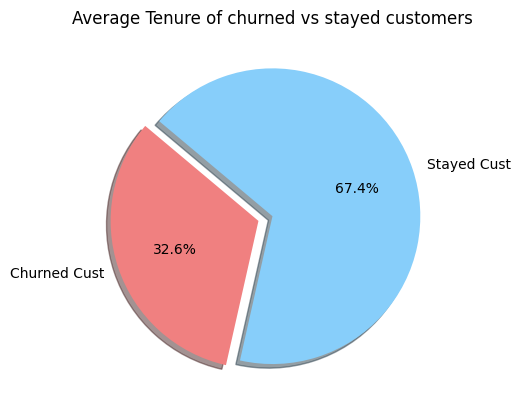

In [156]:
#assign piechart values to variables
labels =["Churned Cust", "Stayed Cust"]
sizes = [average_churn, average_not_churn]
colors= ["lightcoral","lightskyblue"]
explode = (0.1,0)

#display piechart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Average Tenure of churned vs stayed customers")
plt.show()

### 2. Do customers with partners or dependents have a lower churn rate?    

In [157]:
partner_churn = train_data[train_data["Partner"]=="Yes"]["Churn"].value_counts(normalize=True)["Yes"]
no_partner_churn = train_data[train_data["Partner"]=="No"]["Churn"].value_counts(normalize=True)["Yes"]

dependent_churn = train_data[train_data["Dependents"]=="Yes"]["Churn"].value_counts(normalize=True)["Yes"]
no_dependent_churn = train_data[train_data["Dependents"]=="No"]["Churn"].value_counts(normalize=True)["Yes"]

In [158]:
new_df = pd.DataFrame({"Customer_type":["partner churn","no partner churn","With Dependents","Without Dependents"],
                  "churn_rate":[partner_churn,no_partner_churn, dependent_churn, no_dependent_churn]})

new_df

,Customer_type,churn_rate
0,partner churn,0.200976
1,no partner churn,0.325725
2,With Dependents,0.151826
3,Without Dependents,0.315623


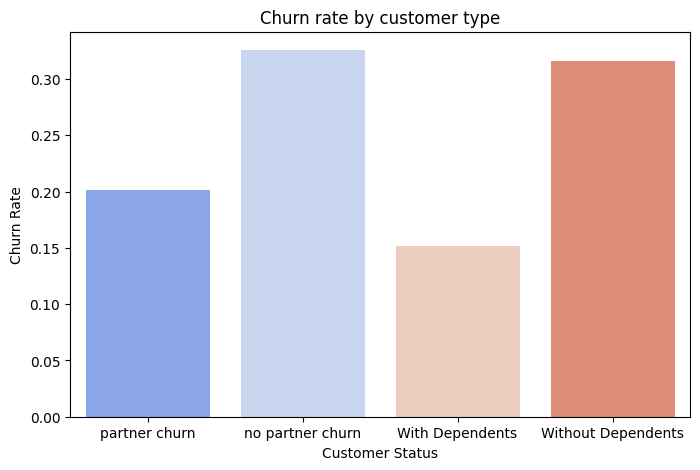

In [159]:
plt.figure(figsize=(8,5))
sns.barplot(data= new_df, x = "Customer_type", y= "churn_rate", palette = "coolwarm")

plt.title("Churn rate by customer type")
plt.xlabel("Customer Status")
plt.ylabel("Churn Rate")
plt.show()

- Create a pipeline to preprocess the data

- Separate features into numeric and categorical for different pipelines

- Scaling or normalize numeric features: Use sklearn.preprocessing.StandardScaler to scale the numerical features

- Encode categorical features: Use OneHotEncoder to encode categorical features


- Balance dataset (depending on what you see): Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html


### 3. Is there a correlation between the contract term (Contract) and customer churn?

In [160]:
#transform the categorical values to numerical
label_encoder = LabelEncoder()
train_data["Contract_encoded"] = label_encoder.fit_transform(train_data["Contract"])
train_data["Churn_encoded"] = label_encoder.fit_transform(train_data["Churn"])

In [161]:
train_data["Churn_encoded"].unique()

array([0, 1])

In [162]:
train_data[["Churn_encoded", "Contract_encoded"]].corr()

,Churn_encoded,Contract_encoded
Churn_encoded,1.000000,-0.405688
Contract_encoded,-0.405688,1.000000


##### Conclusion: There is a negative correlation between contract and customer churn

#### 4.What are the common payment methods (Payment Method) among customers who churned?

In [163]:
churned_customers = train_data[train_data["Churn"] == 'Yes']

In [164]:
payment_method_counts = churned_customers["PaymentMethod"].value_counts()
payment_method_counts

PaymentMethod
Electronic check             758
Mailed check                 212
Bank transfer (automatic)    198
Credit card (automatic)      168
Name: count, dtype: int64

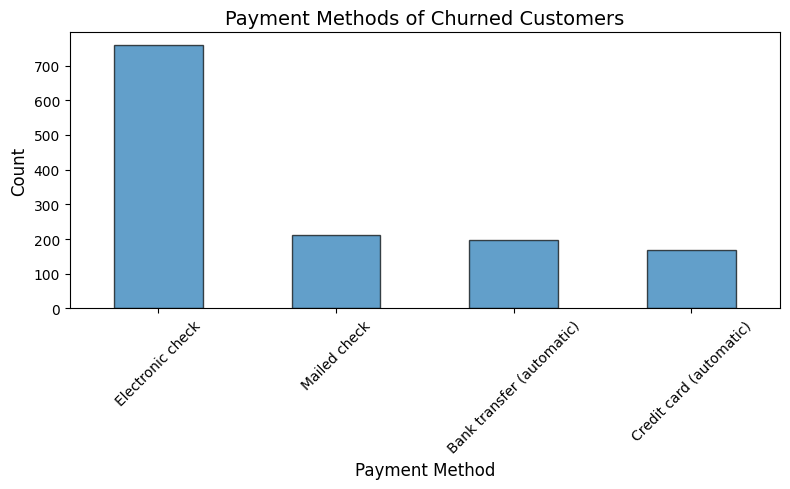

In [165]:
plt.figure(figsize=(8, 5))
payment_method_counts.plot(kind='bar', alpha=0.7, edgecolor='black')

plt.title("Payment Methods of Churned Customers", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()

#### 5. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

In [166]:
train_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Contract_encoded',
       'Churn_encoded'],
      dtype='object')

In [167]:
tech_services = train_data[['PhoneService','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]

In [168]:
for service in tech_services:
    print(f"{service}: {train_data[train_data[service] == "Yes"]["Churn"].value_counts(normalize=True)["Yes"]}")
    print(f"Without {service}: {train_data[train_data[service] == "No"]["Churn"].value_counts(normalize=True)["Yes"]}")
    print("-"*50)

PhoneService: 0.26701800614844096
Without PhoneService: 0.24539877300613497
--------------------------------------------------
MultipleLines: 0.2859154929577465
Without MultipleLines: 0.24957088911774802
--------------------------------------------------
OnlineSecurity: 0.14697802197802198
Without OnlineSecurity: 0.3127962085308057
--------------------------------------------------
OnlineBackup: 0.21304849884526558
Without OnlineBackup: 0.29205678042887345
--------------------------------------------------
DeviceProtection: 0.2253440366972477
Without DeviceProtection: 0.2858441952106699
--------------------------------------------------
TechSupport: 0.1482226693494299
Without TechSupport: 0.31390765765765766
--------------------------------------------------


#### 6. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?

In [169]:
#all Customers who had streaming services
with_streaming_services = train_data[(train_data["StreamingTV"] == "Yes") & (train_data["StreamingMovies"] == "Yes")]

#all Customers who had no streaming services
without_streaming_services = train_data[(train_data["StreamingTV"] == "No") & (train_data["StreamingMovies"] == "No")]

#customers with streaming services but churned
churn_cust_streaming = with_streaming_services["Churn"].value_counts()["Yes"]

#customers with no streaming services but churned
churn_without_streaming = without_streaming_services["Churn"].value_counts()["No"]


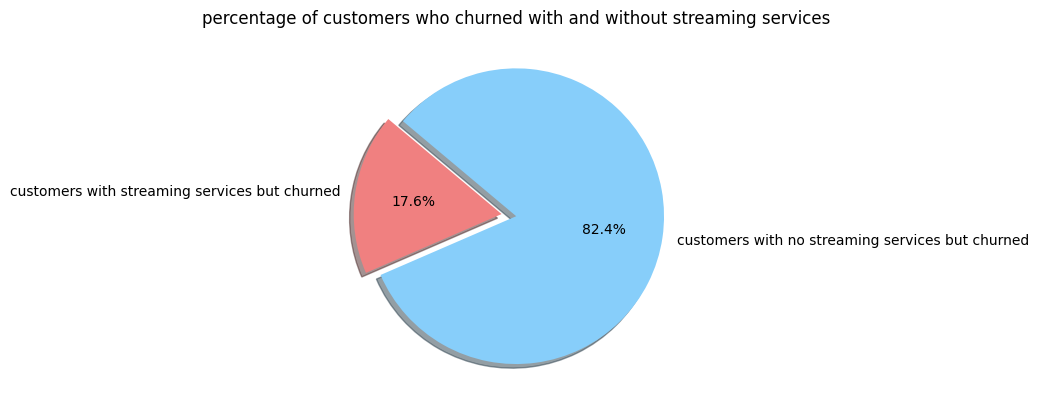

In [170]:
labels =["customers with streaming services but churned", "customers with no streaming services but churned"]
sizes = [churn_cust_streaming, churn_without_streaming]
colors= ["lightcoral","lightskyblue"]
explode = (0.1,0)

#display piechart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("percentage of customers who churned with and without streaming services")
plt.show()

#### 7. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?

In [171]:
train_data[["TotalCharges","Churn_encoded"]].corr()

,TotalCharges,Churn_encoded
TotalCharges,1.000000,-0.194742
Churn_encoded,-0.194742,1.000000


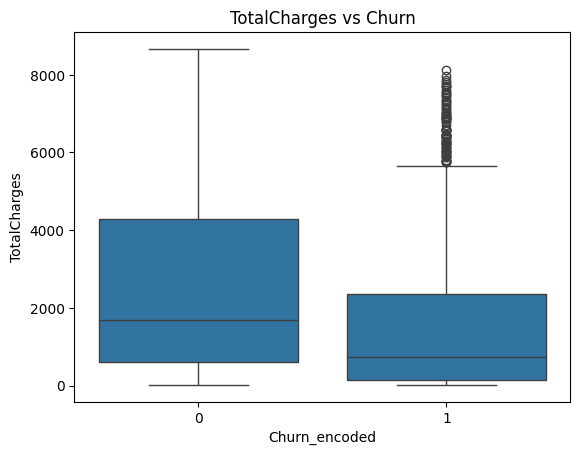

In [172]:
# Boxplot for TotalCharges vs Churn
sns.boxplot(x='Churn_encoded', y='TotalCharges', data=train_data)
plt.title('TotalCharges vs Churn')
plt.show()

### make copy of dataset

In [173]:
train_data_copy = train_data.copy()

In [174]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


# Check for Imbalance

In [175]:
train_data_copy["Churn"].value_counts()

Churn
No     3707
Yes    1336
Name: count, dtype: int64

In [176]:


# Separate majority and minority classes
churn_major = train_data_copy[train_data_copy["Churn"] =="No"]
churn_minority = train_data_copy[train_data_copy["Churn"] =="Yes"]

#use resample to generate more data to make up for the minority sample
train_minority_upsampled = resample(churn_minority, 
                                    replace = True,
                                    n_samples=len(churn_major),
                                    random_state =42)

train_model = pd.concat([churn_major, train_minority_upsampled])
train_model["Churn"].value_counts()

Churn
No     3707
Yes    3707
Name: count, dtype: int64

In [177]:
X = train_model.drop(columns=["Churn"])
y = train_model["Churn"]

In [178]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [179]:
#separate numerical and categorical columns 
numercal_cols = X.select_dtypes(include = ["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include = ["object"]).columns

In [180]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


numercal_transformer =Pipeline(steps = [
    ("scaler", RobustScaler()),
    ("quantile_transform", QuantileTransformer(output_distribution = "normal"))
])


categorical_transformer = Pipeline(steps= [("onehot",OneHotEncoder(handle_unknown = "ignore", sparse_output =False) )])

preprocessor = ColumnTransformer(transformers=[
    ("numerical",numercal_transformer,numercal_cols ),
    ("categorical",categorical_transformer,categorical_cols  )
])

preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('quantile_transform',
                                                  QuantileTransformer(output_distribution='normal'))]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [192]:
from sklearn.model_selection import train_test_split

#split data to train and test
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size =0.3, random_state=42,stratify = y)

In [193]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5189 entries, 4448 to 1414
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5189 non-null   object 
 1   SeniorCitizen     5189 non-null   int64  
 2   Partner           5189 non-null   object 
 3   Dependents        5189 non-null   object 
 4   tenure            5189 non-null   int64  
 5   PhoneService      5189 non-null   object 
 6   MultipleLines     5189 non-null   object 
 7   InternetService   5189 non-null   object 
 8   OnlineSecurity    5189 non-null   object 
 9   OnlineBackup      5189 non-null   object 
 10  DeviceProtection  5189 non-null   object 
 11  TechSupport       5189 non-null   object 
 12  StreamingTV       5189 non-null   object 
 13  StreamingMovies   5189 non-null   object 
 14  Contract          5189 non-null   object 
 15  PaperlessBilling  5189 non-null   object 
 16  PaymentMethod     5189 non-null   object 
 1

In [199]:
X_train_processed = preprocessor.fit_transform(X_train)
x_test_processed = preprocessor.transform(X_test)

In [196]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5189, 21)
(2225, 21)
(5189,)
(2225,)


# Modeling

In [189]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### define models

In [191]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

## Create a Pipeline for Each Model
#### Standardization is crucial for some models (e.g., SVM, KNN, Logistic Regression).

In [197]:
pipelines = {name: Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
]) for name, model in models.items()}

## Train and Evaluate Models
### Iterate through each pipeline, train the model, and evaluate its performance.

In [200]:
results = {}

for name, pipeline in pipelines.items():
    # Train the pipeline
    pipeline.fit(X_train_processed, y_train)
    
    # Predictions
    y_pred = pipeline.predict(x_test_processed)
    y_pred_prob = pipeline.predict_proba(x_test_processed)[:, 1] if hasattr(pipeline, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else 'N/A'
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Classification Report': classification_report(y_test, y_pred, output_dict=True)
    }
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Results:
Accuracy: 0.7644943820224719
ROC AUC: 0.8440455183023392
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1113
           1       0.74      0.82      0.78      1112

    accuracy                           0.76      2225
   macro avg       0.77      0.76      0.76      2225
weighted avg       0.77      0.76      0.76      2225

--------------------------------------------------
Random Forest Results:
Accuracy: 0.8853932584269663
ROC AUC: 0.9639419192408876
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1113
           1       0.84      0.95      0.89      1112

    accuracy                           0.89      2225
   macro avg       0.89      0.89      0.88      2225
weighted avg       0.89      0.89      0.88      2225

--------------------------------------------------
Support Vector Machine Results:
Accuracy: 0.7878651685393259
ROC AUC: 0.862440

#### Summarize the results for easy comparison.

In [201]:
summary = pd.DataFrame({
    model: {
        'Accuracy': results[model]['Accuracy'],
        'ROC AUC': results[model]['ROC AUC']
    } for model in results
}).T

print("Model Performance Summary:")
print(summary)

Model Performance Summary:
                        Accuracy   ROC AUC
Logistic Regression     0.764494  0.844046
Random Forest           0.885393  0.963942
Support Vector Machine  0.787865  0.862441
K-Nearest Neighbors     0.761798  0.826476
Naive Bayes             0.746067  0.823688
Decision Tree           0.855730  0.856331
